In [18]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import tweepy
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [19]:
# Twitter API Keys
consumer_key = "zVyUV4afVlhAHTrkNY1ABGicW"
consumer_secret = "mEYy1WJy4QJ0R7Rd0xRX4JMWlGW7qGwLwQYTVLGyNAb0koxCGi"
access_token = "971902934899478528-AR7XPv7HEEprU1atSUGSmGzMtcNFNe9"
access_token_secret = "ETrEsE9hNHWvpdm3S8luOzSIzDp67ZyyKKP8cqgX6BrCj"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [20]:
sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

In [21]:
for user in target_users:
    
    #Counter 
    counter = 0

    public_tweets = api.user_timeline(user, count = 100)

        

    for tweet in public_tweets:

        #Vader

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]


        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        

        counter = counter + 1

In [22]:
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,-0.3818,Mon Mar 19 19:33:04 +0000 2018,0.110,0.890,0.000,Follow the dramatic and deadly series of event...,0,@BBC
1,0.1531,Mon Mar 19 18:33:05 +0000 2018,0.116,0.709,0.175,Leonardo DiCaprio stars in the true story of a...,1,@BBC
2,-0.1027,Mon Mar 19 18:03:01 +0000 2018,0.080,0.920,0.000,😂📸 @AlanCarr learned the hard way that you onl...,2,@BBC
3,0.0000,Mon Mar 19 17:30:08 +0000 2018,0.000,1.000,0.000,🎤Pop band @FifthHarmony have announced they're...,3,@BBC
4,-0.7096,Mon Mar 19 17:00:05 +0000 2018,0.414,0.442,0.144,Murder. Innocence. Lies. \n\n@AgathaChristie c...,4,@BBC
5,0.0000,Mon Mar 19 16:33:29 +0000 2018,0.000,1.000,0.000,Here are the latest snow scenes from around th...,5,@BBC
6,0.0000,Mon Mar 19 15:02:02 +0000 2018,0.000,1.000,0.000,'Flabbergasted'. 🎶This is the incredible momen...,6,@BBC
7,0.0000,Mon Mar 19 14:30:08 +0000 2018,0.000,1.000,0.000,Meet the dancing slum kids tipped for stardom ...,7,@BBC
8,0.6588,Mon Mar 19 13:44:55 +0000 2018,0.000,0.788,0.212,RT @bbcgetinspired: The Nation's Billion Steps...,8,@BBC
9,-0.3412,Mon Mar 19 13:03:04 +0000 2018,0.112,0.888,0.000,"💭 ""There's always that voice in the back of yo...",9,@BBC


In [23]:
#creating the CSV

news_sentiments.to_csv("Twitter_News_Mood.csv", index=False)

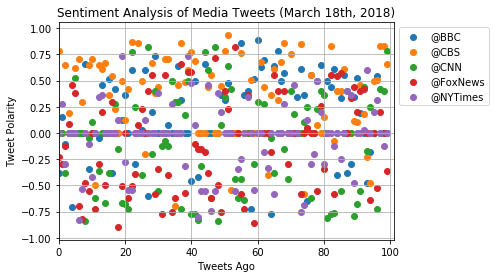

In [24]:
#Scatterplot

plt.xlim(0, 101)

for user in target_users:
    dataframe = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
plt.legend(bbox_to_anchor = (1,1))

plt.title("Sentiment Analysis of Media Tweets (March 18th, 2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")


plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [25]:
average_sentiment = news_sentiments.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.144423
@CBS        0.317317
@CNN       -0.080983
@FoxNews   -0.078431
@NYTimes   -0.043420
Name: Compound, dtype: float64

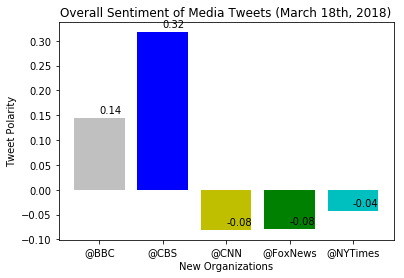

In [26]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])

plt.title("Overall Sentiment of Media Tweets (March 18th, 2018)")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()